In [1]:
from collections import Counter

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats as st
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
application = pd.read_csv("all_data.csv")
application = application.drop("Unnamed: 0", axis=1)

goodbad = pd.read_csv("gsb.csv")
goodbad = goodbad.drop("Unnamed: 0", axis=1)

In [4]:
data_frame = pd.merge(application, goodbad, on="ID").drop_duplicates(subset="ID")

In [5]:
def children(cnt_children):
    
    if cnt_children >= 3:
        cnt_children = 3
        
    return cnt_children

In [6]:
data_frame["CHILDREN"] = data_frame.apply(lambda df: children(df["CNT_CHILDREN"]), axis=1)

In [7]:
def members(cnt_fam_members):
    
    if cnt_fam_members >= 4:
        cnt_fam_members = 4
        
    return cnt_fam_members

In [8]:
data_frame["MEMBERS"] = data_frame.apply(lambda df: members(df["CNT_FAM_MEMBERS"]), axis=1)

In [9]:
def age(days_birth):
    
    return np.abs(days_birth//365)

In [10]:
data_frame["AGE"] = data_frame.apply(lambda df: np.abs(df["DAYS_BIRTH"]//365), axis=1)

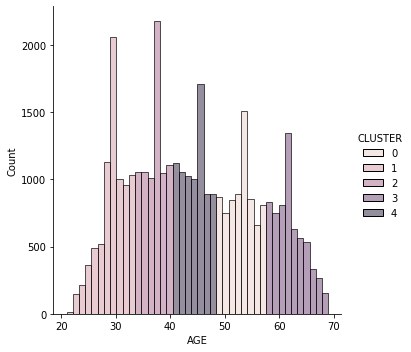

In [11]:
data = data_frame[["AGE"]].copy()

kmeans = KMeans(n_clusters=5, random_state=1,).fit(data)
data["CLUSTER"] = kmeans.labels_

sns.displot(data=data, x="AGE", hue="CLUSTER")

In [12]:
a = data["AGE"].min()
b = data["AGE"].max()

intervals = []

for i in range(5):
    cmin = data[data["CLUSTER"] == i]["AGE"].min()
    if cmin == a:
        cmin = 18
    cmax = data[data["CLUSTER"] == i]["AGE"].max()
    if cmax == b:
        cmax = 80
    
    intervals.append(pd.Interval(cmin, cmax, closed="both"))
    
age_intervals_list = sorted(intervals)

In [13]:
def age_intervals(age):
    
    """
    0 - <18, 33>
    1 - <34, 40>
    2 - <41, 48>
    3 - <49, 57>
    4 - <58, 80>
    """
    
    for number, interval in enumerate(age_intervals_list):
        if age in interval:
            return number

In [14]:
data_frame["AGE"] = data_frame.apply(lambda df: age_intervals(df["AGE"]), axis=1)

In [15]:
def employed(days_employed):
    
    if days_employed > 0:
        return 45
    else:
        return int(np.floor(np.abs(days_employed)/365))

In [16]:
data_frame["YEARS_EMPLOYED"] = data_frame.apply(lambda df: employed(df["DAYS_EMPLOYED"]), axis=1)

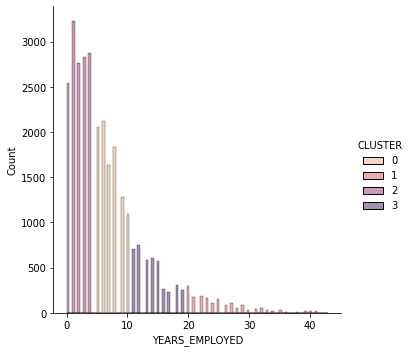

In [17]:
data = data_frame[data_frame["NAME_INCOME_TYPE"] != "Pensioner"][["YEARS_EMPLOYED"]].copy()

kmeans = KMeans(n_clusters=4, random_state=1,).fit(data)
data["CLUSTER"] = kmeans.labels_

sns.displot(data=data, x="YEARS_EMPLOYED", hue="CLUSTER", palette="flare")

In [18]:
intervals = []

for i in range(4):
    cmin = data[data["CLUSTER"] == i]["YEARS_EMPLOYED"].min()
    cmax = data[data["CLUSTER"] == i]["YEARS_EMPLOYED"].max()
    
    intervals.append(pd.Interval(cmin, cmax, closed="both"))
    
employed_intervals_list = sorted(intervals)
employed_intervals_list.append(pd.Interval(44, 50, closed="both"))

In [19]:
def employed_intervals(years):
    
    """
    0 - <0, 4>
    1 - <5, 10>
    2 - <11, 19>
    3 - <20, 43>
    4 - <44, 50>
    """
    
    for number, interval in enumerate(employed_intervals_list):
        if years in interval:
            return number

In [20]:
data_frame["YEARS_EMPLOYED"] = data_frame.apply(lambda df: employed_intervals(df["YEARS_EMPLOYED"]), axis=1)

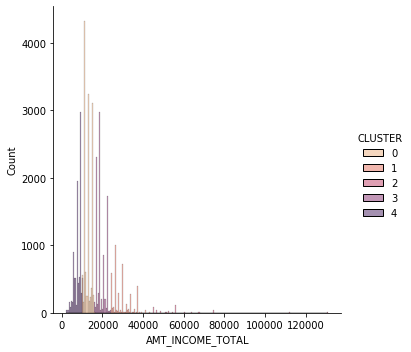

In [21]:
data = (data_frame[["AMT_INCOME_TOTAL"]]/12).copy()

kmeans = KMeans(n_clusters=5, random_state=1,).fit(data)
data["CLUSTER"] = kmeans.labels_

sns.displot(data=data, x="AMT_INCOME_TOTAL", hue="CLUSTER", palette="flare")

In [22]:
a = data["AMT_INCOME_TOTAL"].min()
b = data["AMT_INCOME_TOTAL"].max()

intervals = []

for i in range(5):
    cmin = data[data["CLUSTER"] == i]["AMT_INCOME_TOTAL"].min()
    if cmin == a:
        cmin = 0
    cmax = data[data["CLUSTER"] == i]["AMT_INCOME_TOTAL"].max()
    if cmax == b:
        cmax = 200000
    
    intervals.append(pd.Interval(cmin, cmax, closed="both"))
    
income_intervals_list = sorted(intervals)

In [23]:
def income_intervals(years):
    
    """
    0 - <0, 10350>
    1 - <10500, 15975>
    2 - <16125, 24000>
    3 - <24375, 43125>
    4 - <44250, 200000>
    """
    
    for number, interval in enumerate(income_intervals_list):
        if years in interval:
            return number

In [24]:
data_frame["INCOME"] = data_frame.apply(lambda df: income_intervals(df["AMT_INCOME_TOTAL"]/12), axis=1)

In [25]:
data_frame = data_frame.drop(["AMT_INCOME_TOTAL",
                              "CNT_CHILDREN",
                              "CNT_FAM_MEMBERS",
                              "DAYS_BIRTH",
                              "DAYS_EMPLOYED",
                              "MONTHS_BALANCE",
                              "STATUS",
                              "ACTIVITY"], axis=1)

In [26]:
data_frame = data_frame[data_frame["NAME_INCOME_TYPE"] != 'Student']

In [27]:
def education(name_education_type):
    
    if name_education_type == "Academic degree":
        name_education_type = "Higher education"
    
    return name_education_type

In [28]:
data_frame["NAME_EDUCATION_TYPE"] = data_frame.apply(lambda df: education(df["NAME_EDUCATION_TYPE"]), axis=1)

In [29]:
def family_status(name_family_status):
    
    if name_family_status == "Civil marriage":
        name_family_status = "Married"
        
    return name_family_status

In [30]:
data_frame["NAME_FAMILY_STATUS"] = data_frame.apply(lambda df: family_status(df["NAME_FAMILY_STATUS"]), axis=1)

In [84]:
#data_frame.to_csv("executor_data_prepared.csv")